**Задание 1**
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'

In [2]:
boston = load_boston()
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston["feature_names"])

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston["feature_names"])

In [5]:
model = TSNE(n_components=2, learning_rate=250, random_state=42)
X_tsne = model.fit_transform(X_train_scaled)

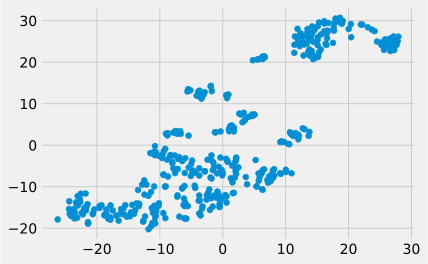

In [6]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

**Задание 2**
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [7]:
model_2 = KMeans(n_clusters=3, random_state=42, max_iter=100)

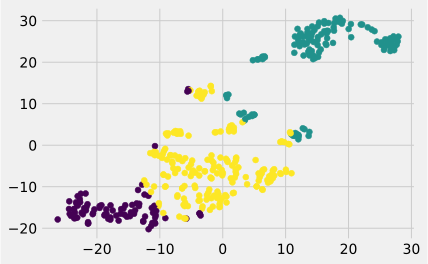

In [8]:
X_clusters = model_2.fit_predict(X_train_scaled)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X_clusters)

In [9]:
print(X_train_scaled['CRIM'][X_clusters == 0].mean())
print(y_train[X_clusters == 0].mean())

-0.3988641865191748
price    27.788372
dtype: float64


In [10]:
print(X_train_scaled['CRIM'][X_clusters == 1].mean())
print(y_train[X_clusters == 1].mean())

0.8109035550510459
price    16.165354
dtype: float64


In [11]:
print(X_train_scaled['CRIM'][X_clusters == 2].mean())
print(y_train[X_clusters == 2].mean())

-0.3595938819415387
price    24.958115
dtype: float64


***Задание 3**
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [12]:
X_clusters_test = model_2.fit_predict(X_test_scaled)

In [14]:
print(X_test_scaled['CRIM'][X_clusters_test == 0].mean())
print(y_test[X_clusters_test == 0].mean())

-0.4779584800485558
price    34.553846
dtype: float64


In [15]:
print(X_test_scaled['CRIM'][X_clusters_test == 1].mean())
print(y_test[X_clusters_test == 1].mean())

0.7797755164435579
price    16.710526
dtype: float64


In [16]:
print(X_test_scaled['CRIM'][X_clusters_test == 2].mean())
print(y_test[X_clusters_test == 2].mean())

-0.459176654592627
price    21.717647
dtype: float64
